In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import mne
from tqdm import tqdm
# from blab.itertools import true_meshgrid
import matplotlib
import seaborn as sns
import pingouin as pg
matplotlib.rcParams['pdf.fonttype'] = 42

In [2]:
d2 = pd.read_csv('../data/baseline_level/pow_avg_D2_base1_base2_f0=6Hz_df=2Hz_eloreta_Norm_to_Im1_Bgr_PrecuneusR_maxt.txt', sep='  ', header=None).iloc[:15]
# d2.insert(loc=9, value=[0, 0])
# d2.insert(loc=9, column=1)
d3 = pd.read_csv('../data/baseline_level/pow_avg_D3_base1_base2_f0=6Hz_df=2Hz_eloreta_Norm_to_Im1_Bgr_PrecuneusR_maxt.txt', sep='  ', header=None)

def gather_df(csv_names):
    d2 = pd.read_csv(csv_names[0], sep='  ', header=None).iloc[:15]
    d3 = pd.read_csv(csv_names[1], sep='  ', header=None).iloc[:15]
    names = ['Day', 'Subject', 'Session']

    index2 = pd.MultiIndex.from_product([['TMS'], np.arange(1, 16, dtype=int), ['Im1', 'Im2']], names=names)
    index3 = pd.MultiIndex.from_product([['Sham'], np.arange(16, 16 + 15, dtype=int), ['Im1', 'Im2']], names=names)

    d2 = d2.stack()
    d3 = d3.stack()

    d2.index = index2
    d3.index = index3

    df = pd.concat([d2, d3]).reset_index()
    df.columns = names + ['Power']
    df = df.query("Subject != 10")
    return df

precuneus_df = gather_df([
    '../data/baseline_level/pow_avg_D2_base1_base2_f0=6Hz_df=2Hz_eloreta_Norm_to_Im1_Bgr_PrecuneusR_maxt.txt',
    '../data/baseline_level/pow_avg_D3_base1_base2_f0=6Hz_df=2Hz_eloreta_Norm_to_Im1_Bgr_PrecuneusR_maxt.txt'
])

front_df = gather_df([
    '../data/baseline_level/pow_avg_D2_base1_base2_f0=10Hz_df=2Hz_eloreta_Norm_to_Im1_Bgr_Front.txt',
    '../data/baseline_level/pow_avg_sham_base1_base2_f0=10Hz_df=2Hz_eloreta_Norm_to_Im1_Bgr.txt'
])

# arr = np.concatenate([d2.to_numpy().flatten(), d3.to_numpy().flatten()]) 

# df = pd.DataFrame(arr, columns=['Pow'], index=index).reset_index()

/var/folders/tj/lr6p2mw95bqcmgs698v6nqx40000gn/T/ipykernel_72088/1491074391.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  d2 = pd.read_csv('../data/baseline_level/pow_avg_D2_base1_base2_f0=6Hz_df=2Hz_eloreta_Norm_to_Im1_Bgr_PrecuneusR_maxt.txt', sep='  ', header=None).iloc[:15]
/var/folders/tj/lr6p2mw95bqcmgs698v6nqx40000gn/T/ipykernel_72088/1491074391.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  d3 = pd.read_csv('../data/baseline_level/pow_avg_D3_base1_base2_f0=6Hz_df=2Hz_eloreta_Norm_to_Im1_Bgr_PrecuneusR_maxt.txt', sep='  ', header=None)
/var/folders/tj/lr6p2mw95bqcmgs698v6nqx40000gn/T/i

In [5]:
front_df.to_csv('../data/src_baseline_dfs/alpha_frontal.csv', index=False)
precuneus_df.to_csv('../data/src_baseline_dfs/theta_precuneusr_maxt.csv', index=False)

In [4]:
pg.mixed_anova(df, 'Pow', within='Session', between='Day', subject='Subject', correction=True)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Day,0.008215,1,27,0.008215,0.084666,0.773294,0.003126,NaN
1,Session,0.073496,1,27,0.073496,7.287878,0.011832,0.212550,1.0
2,Interaction,0.051605,1,27,0.051605,5.117217,0.031948,0.159329,NaN


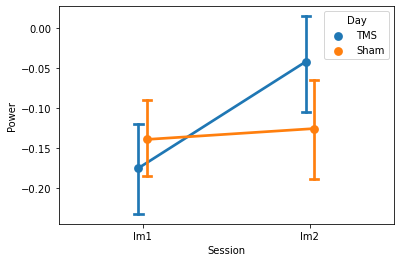

In [22]:
ax = sns.pointplot(x='Session', y='Power', hue='Day', data=df.query('Subject != 10'), dodge=0.05, capsize=0.05, ci=66.666)
ax.figure.savefig('src_pow_4-8Hz-precuneusr-maxt_plot.pdf')

In [6]:
sas = df['Pow'].to_numpy().reshape(2, 15, 2)
sas = np.swapaxes(sas, 1, 2)
sas[0, :, 9] *= np.nan
sos = sas[0, 0]
sos = sos
sos = [stats.shapiro(i[~np.isnan(i)]).pvalue for i in sas.reshape(4, -1)]
for i, p in zip(['D2 Im1', 'D2 Im2', 'Sham Im1', 'Sham Im2'], sos):
    print(f'{i} pvalue = {p:<0.3f}')

ValueError: cannot reshape array of size 58 into shape (2,15,2)

<AxesSubplot:xlabel='Session', ylabel='Pow'>

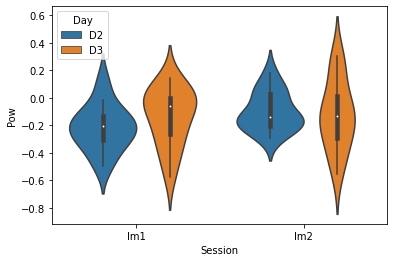

In [62]:
sns.violinplot(x='Session', y='Pow', hue='Day', data=df.query('Subject != 10 and Subject != 8'))


In [16]:
a = df.set_index(['Day', 'Subject', 'Session']).unstack()
a = a['Pow', 'Im2'] - a['Pow', 'Im1']
a = pd.DataFrame(a, columns=['SRC_Alpha_Frontal'])
a.to_csv('src_dpow_avg_D2_D3_Im2-Im1_f0=10Hz_df=2Hz_eloreta_Norm_to_Im1_Bgr_Front.txt')

In [20]:
df.to_csv('theta_frontal_src.csv', index=False)

In [47]:
sas[1]

array([[-0.06235276, -0.57267929, -0.2108896 , -0.0014825 , -0.00485475,
        -0.03143198, -0.20053723, -0.44059778, -0.36055244,  0.08420991,
        -0.15265443, -0.3092884 ,  0.0440327 , -0.01178098,  0.14224153],
       [-0.20511458, -0.55175085, -0.24298705, -0.13248111,  0.02297712,
        -0.33421047, -0.12041706, -0.36011023, -0.45817889,  0.26208626,
         0.18595024, -0.12532133,  0.00096623, -0.1285618 ,  0.30193858]])

In [58]:
stats.ttest_ind(*sas[0][:, ~(np.isnan(sas[0]).any(0))])

Ttest_indResult(statistic=-1.5084872082375225, pvalue=0.14348663795629032)

In [15]:
df.query('Day == "D3" and Session == "Im2"')['Pow'].to_numpy()

array([ 0.12153952,  0.20443193, -0.20753074, -0.47560322, -0.4842323 ,
       -0.41600376, -0.05605296, -0.59118108, -0.32595243, -0.246897  ,
        0.226598  ,  1.6539278 , -0.52316866, -0.02237811,  0.30047709])

In [9]:
front_df = pd.read_csv('../data/src_baseline_dfs/alpha_frontal.csv')
precuneus_df = pd.read_csv('../data/src_baseline_dfs/theta_precuneusr_maxt.csv')
front_df.set_index(['Day', 'Session', 'Subject'], inplace=True)
precuneus_df.set_index(['Day', 'Session', 'Subject'], inplace=True)
front_df.columns = ['AlphaFrontal']
front_df['ThetaPrecuneus'] = precuneus_df['Power']
front_df.to_csv('tables/BASELINE_BGR-NORM_ELORETA_MAXT_SRC-POWER.csv')

### Theta PrecuneusR_maxt: 
yuen test, trim 0.2

- d2im1 vs d2im2: t = -3.8399, df = 9, p-value = 0.003967
- d3im1 vs d3im2: t = 0.57099, df = 8, p-value = 0.5837
- d2im1 vs d3im1: t = -1.2209, df = 15.307, p-value = 0.2406
- d2im2 vs d3im2: t = 0.61654, df = 14.276, p-value = 0.5472

### Alpha Frontal:
yuen test, trim 0.2

- d2im1 vs d2im2: t = -1.8835, df = 9, p-value = 0.09229
- d3im1 vs d3im2: t = -0.68472, df = 8, p-value = 0.5129
- d2im1 vs d3im1: t = 0.93219, df = 10.672, p-value = 0.3718
- d2im2 vs d3im2: t = 1.1104, df = 11.536, p-value = 0.2894